In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import os

In [ ]:
cd drive/MyDrive/IT350-PROJECT

[Errno 2] No such file or directory: 'drive/MyDrive/IT350-PROJECT'
/content/drive/.shortcut-targets-by-id/1EXQhBNQ9WdJTPdtMcBPWxwP7Xkj-o-6O/IT350-PROJECT


In [ ]:
text = []

dataset = pd.read_csv('noaug_new.csv')
dataset = dataset[dataset['Text'].notna()]
dataset = dataset[dataset['Label'].notna()]
# # dataset = dataset.groupby('Label').head(75000)

for index, row in dataset.iterrows():
  text.append(str(row['Text']))

labels=dataset['Label']

labels = np.array(list(map(lambda x: 1 if x=="pos" else 0, labels)))

In [ ]:
textTrain = []

dataset = pd.read_csv('aug_train_new.csv')
dataset = dataset[dataset['Text'].notna()]
dataset = dataset[dataset['Label'].notna()]

for index, row in dataset.iterrows():
  textTrain.append(str(row['Text']))

labelsTrain = dataset['Label']

labelsTrain = np.array(list(map(lambda x: 1 if x=="pos" else 0, labelsTrain)))

In [ ]:
textVal = []

dataset = pd.read_csv('aug_val_new.csv')
dataset = dataset[dataset['Text'].notna()]
dataset = dataset[dataset['Label'].notna()]

for index, row in dataset.iterrows():
  textVal.append(str(row['Text']))

labelsVal = dataset['Label']

labelsVal = np.array(list(map(lambda x: 1 if x=="pos" else 0, labelsVal)))

In [ ]:
labelsTrain.shape

(285629,)

In [ ]:
labelsVal.shape

(60000,)

In [ ]:
pip install transformers

     |████████████████████████████████| 4.0 MB 28.4 MB/s 
     |████████████████████████████████| 77 kB 8.7 MB/s 
     |████████████████████████████████| 596 kB 58.2 MB/s 
     |████████████████████████████████| 895 kB 67.7 MB/s 
     |████████████████████████████████| 6.6 MB 49.0 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
from transformers import DebertaTokenizer, TFDebertaForSequenceClassification
import tensorflow as tf

tokenizer = DebertaTokenizer.from_pretrained("kamalkraj/deberta-base")
model = TFDebertaForSequenceClassification.from_pretrained("kamalkraj/deberta-base", num_labels = 2)

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/744 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/529M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFDebertaForSequenceClassification.

Some layers of TFDebertaForSequenceClassification were not initialized from the model checkpoint at kamalkraj/deberta-base and are newly initialized: ['pooler', 'cls_dropout', 'classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-e592d9a7-ce23-243a-5448-586954137dc3)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(text,labels, train_size=0.8, stratify=labels, random_state=42)

In [ ]:
x_train = tokenizer(
   # X_train,
   textTrain,
    add_special_tokens=True,
    max_length=100,
    truncation=True,
    padding=True, 
    return_tensors='tf',
    return_token_type_ids = False,
    return_attention_mask = True,
    verbose = True)

In [ ]:
x_valid = tokenizer(
   # X_val,
   textVal,
    add_special_tokens=True,
    max_length=100,
    truncation=True,
    padding=True, 
    return_tensors='tf',
    return_token_type_ids = False,
    return_attention_mask = True,
    verbose = True)

In [ ]:
# x_test = tokenizer(
#     X_test,
#     add_special_tokens=True,
#     max_length=100,
#     truncation=True,
#     padding=True, 
#     return_tensors='tf',
#     return_token_type_ids = False,
#     return_attention_mask = True,
#     verbose = True)

In [ ]:
input_ids = x_train['input_ids']
attention_mask = x_train['attention_mask']

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import TruncatedNormal
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import BinaryAccuracy
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Dense

In [ ]:
# callbacks = [tf.keras.callbacks.ModelCheckpoint(filepath='deberta_model/',monitor = 'val_loss',mode = 'min',save_best_only=True)]

model.summary()


# optimizer = Adam(learning_rate=5e-05,epsilon=1e-08,decay=0.01,clipnorm=1.0)
optimizer = Adam(learning_rate=2e-05, epsilon=1e-06)
# Set loss and metrics
loss =tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')
# metric = BinaryAccuracy('balanced_accuracy')
# Compile the model
model.compile(optimizer = optimizer,loss = loss, metrics = metric)

#max_len = 100
#input_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_ids")
#input_mask = Input(shape=(max_len,), dtype=tf.int32, name="attention_mask")
#embeddings = model(input_ids,attention_mask = input_mask)[0] 
#out = tf.keras.layers.GlobalMaxPool1D()(embeddings)
#out = Dense(128, activation='relu')(out)
#out = tf.keras.layers.Dropout(0.1)(out)
#out = Dense(32,activation = 'relu')(out)
#y = Dense(1,activation = 'sigmoid')(out)
#model = tf.keras.Model(inputs=[input_ids, input_mask], outputs=y)
#model.layers[2].trainable = True
#model.summary()

Model: "tf_deberta_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 deberta (TFDebertaMainLayer  multiple                 138601728 
 )                                                               
                                                                 
 pooler (TFDebertaContextPoo  multiple                 590592    
 ler)                                                            
                                                                 
 cls_dropout (TFDebertaStabl  multiple                 0         
 eDropout)                                                       
                                                                 
 classifier (Dense)          multiple                  1538      
                                                                 
Total params: 139,193,858
Trainable params: 139,193,858
Non-trainable params: 0
______________

In [25]:
history = model.fit(
    x = [x_train['input_ids'],x_train['attention_mask']] ,
   # y = y_train,
   y = labelsTrain,
    validation_data = [[x_valid['input_ids'],x_valid['attention_mask']], labelsVal],
    epochs = 1,
    batch_size = 32
)

Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.
Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.


8926/8926 [==============================] - 8048s 897ms/step - loss: 0.4597 - accuracy: 0.7775 - val_loss: 0.7882 - val_accuracy: 0.5763


In [26]:
model.save_pretrained('M4/')

Till here


In [ ]:
predicted_raw = mymodel.predict({'input_ids':x_test['input_ids'],'attention_mask':x_test['attention_mask']})

In [ ]:
predicted_raw.shape

(18782, 1)

In [ ]:
predicted_raw

array([[0.25469336],
       [0.14129426],
       [0.9991173 ],
       ...,
       [0.31508395],
       [0.10111965],
       [0.99918705]], dtype=float32)

In [ ]:
pred = []
for i in predicted_raw:
  if(i>0.5):
    pred.append(1)
  else:
    pred.append(0)

pred = np.array(pred)


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93     10331
           1       0.95      0.88      0.91      8451

    accuracy                           0.92     18782
   macro avg       0.93      0.92      0.92     18782
weighted avg       0.92      0.92      0.92     18782



In [ ]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test, pred)
print(cm)

[[9917  414]
 [1024 7427]]


In [ ]:
(9917+7427)/(18782)

0.9234373336172932

Text(51.0, 0.5, 'Truth value')

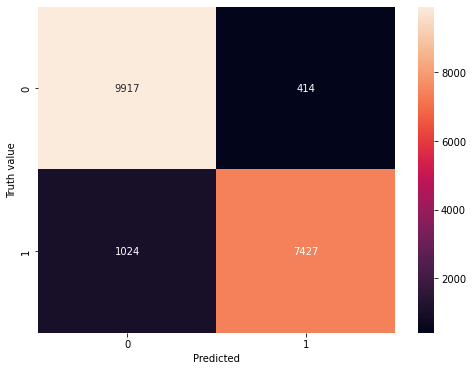

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth value')

VISUALIZATION

In [ ]:
len(dataset)

187811

In [ ]:
lengths = []

for i in dataset["Text"]:
  lengths.append(len(i.split()))

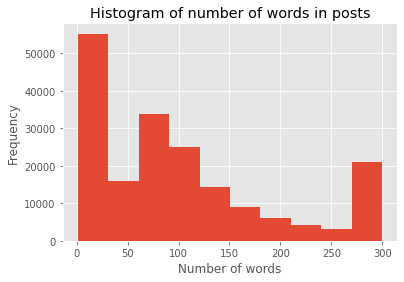

In [ ]:
from matplotlib import pyplot as plt

plt.style.use('ggplot')

plt.hist(lengths, 10)

plt.title("Histogram of number of words in posts")
plt.ylabel("Frequency")
plt.xlabel("Number of words")
plt.show()

[]

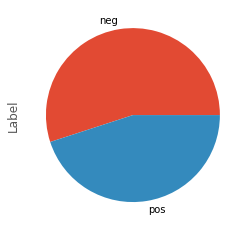

In [ ]:
dataset["Label"].value_counts().plot(kind='pie')
plt.plot()

In [ ]:
dataset["Label"].value_counts()

neg    103306
pos     84505
Name: Label, dtype: int64

In [ ]:
from xml.etree import cElementTree as ET

data_dirs = ["training_t2/TRAINING_DATA/2017_cases","training_t2/TRAINING_DATA/2018_cases"]

lengths_full_dataset = []
for dir in data_dirs:
  for root, dirs, files in os.walk(dir):
    for className in dirs:
      for myfile in os.listdir(dir+'/'+className+'/') :
        with open(dir+'/'+className+'/' + myfile , 'r') as file:
          data = file.read()

        root = ET.fromstring(data)
        i=0

        for writing in list(root):
          posts=[]
          if i==0:
            i+=1
            continue

          text = writing.find('TEXT').text
          lengths_full_dataset.append(len(text.split()))

In [ ]:
l = list(filter(lambda a: a != 0, lengths_full_dataset))

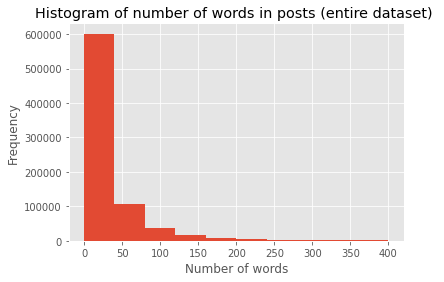

In [ ]:
from matplotlib import pyplot as plt

plt.style.use('ggplot')

plt.hist(l, range=[0, 400])

plt.title("Histogram of number of words in posts (entire dataset) ")
plt.ylabel("Frequency")
plt.xlabel("Number of words")
plt.show()

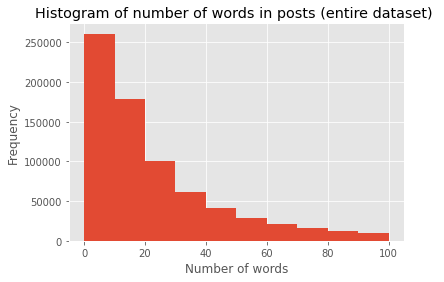

In [ ]:
from matplotlib import pyplot as plt

plt.style.use('ggplot')

plt.hist(l, range=[0, 100])

plt.title("Histogram of number of words in posts (entire dataset) ")
plt.ylabel("Frequency")
plt.xlabel("Number of words")
plt.show()

In [ ]:
print("Number of writings in total =",len(l))

Number of writings in total = 787212


In [ ]:
count_greater_than_100=0

for i in l:
  if i>100:
    count_greater_than_100+=1

In [ ]:
print(count_greater_than_100)

56648


In [ ]:
count_less_than_25=0

for i in l:
  if i<25:
    count_less_than_25+=1

print(count_less_than_25)

496489
